                     线性回归模型----------------建立和培训 
  根据我们在前面第二章中对线性回归模型的解释，数据建模的实际运用——泰坦尼克号模型我们将通过这一定义去建立一个简单的线性回归模型。让我们从导入实现这一需求所必须的包开始。

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


注：pyplot不默认支持显示中文，需要Rcparams修改字体来实现。
plt中的figure函数,绘图     
参数名：figure 备注：返回的Figure实例会被传递给后端的新图像管理器new_figure_manager，这将允许定制的Figure类到pylab接口，额外的参数会被传递给图形初始化函数
参数名：figsize 类型： tuple of integers 整数元组, optional可选, default: None，默认没有 备注：宽度，高度英寸。如果没有提供，默认为rc figure.figsize。

如果你正在创建很多图形，确保在不适的图形上调用关闭函数，因为这将是pylab正确清理内存。rcParams定义默认值，可以在matplotlibrc文件中修改


In [ ]:
我们定义一个独立变量

Input Values...
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
defining the linear regression equation...
Plotting the output...


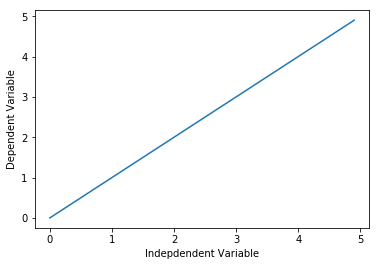

Implementing the linear regression model in TensorFlow...


In [2]:
input_values = np.arange(0.0, 5.0, 0.1)

print('Input Values...')
print(input_values)

print('defining the linear regression equation...')
weight=1
bias=0


output = weight*input_values + bias

print('Plotting the output...')
plt.plot(input_values,output)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()
print('Implementing the linear regression model in TensorFlow...')

https://www.cnblogs.com/TensorSense/p/6802280.html

现在，让我们在tensorflow代码中去理解。

<font color=#FF0000> Tensorflow中的线性回归 </font> 

对于第一部分，我们将生成随机数据点并定义一个线性关系，我们将使用tensorflow来调整并获得正确的参数。

In [3]:
input_values = np.random.rand(100).astype(np.float32)

In [16]:
input_values = np.random.rand(100).astype(np.float32)
print(input_values)

[0.42033228 0.5963097  0.4023396  0.717908   0.53151834 0.25332552
 0.97751486 0.7205613  0.27657962 0.07477889 0.11128575 0.82746655
 0.16186203 0.18979247 0.40814823 0.5533579  0.70759684 0.71830815
 0.3413415  0.1304997  0.5681144  0.04668642 0.96550435 0.22972603
 0.46595147 0.53121257 0.3642674  0.96821743 0.9551877  0.5944036
 0.90094113 0.6417873  0.30401826 0.4932522  0.6866288  0.77156883
 0.92808425 0.79278886 0.78724545 0.72384894 0.63069445 0.77906936
 0.6914404  0.98756516 0.3353803  0.27006382 0.01009431 0.30786645
 0.04711584 0.46536386 0.41362128 0.32260433 0.6487513  0.9792802
 0.8799003  0.49077898 0.10275687 0.23788983 0.7916724  0.67415637
 0.01382603 0.76243323 0.14029425 0.78096765 0.3797123  0.40258673
 0.8562378  0.3332955  0.40058127 0.31077176 0.703207   0.7997768
 0.2129223  0.31148523 0.5325596  0.74074703 0.8542488  0.93233675
 0.9165258  0.8053432  0.05164476 0.70947915 0.9524554  0.7945742
 0.90978897 0.07795006 0.6640318  0.26881677 0.55826664 0.33018446

注意：创建100个浮点数32的[0，1]的之间的随机数https://blog.csdn.net/wave_xiao/article/details/79141294

本例中模型的方程为:
                            Y=2x+3
这个等式本身并没有什么特别的地方，它只是我们用来生成数据点的模型。实际上，你可以根据自己的偏好任意的去调节参数，正如你们之后会这样做。我们在这些点中加入一些高斯噪声使其变得更生动。
以下是一个样本中的数据

In [4]:
output_values = input_values * 2 + 3
output_values = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(output_values)
print('Sample from the input and output values of the linear regression model...')
print(list(zip(input_values,output_values))[5:10])

Sample from the input and output values of the linear regression model...
[(0.817965, 4.635703381443361), (0.35672733, 3.5591916644268577), (0.939491, 4.815186982860583), (0.25160825, 3.4349347953916154), (0.5616466, 4.048211808676295)]


注意：vectorize 向量化      
两个小括号
zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
http://www.runoob.com/python/python-func-zip.html
lambda x，y：x+y                  https://blog.csdn.net/zjuxsl/article/details/79437563

np.random.normal(loc=0.0, scale=0.1)    https://blog.csdn.net/doufuxixi/article/details/80356752
loc：float
    此概率分布的均值（对应着整个分布的中心centre）
scale：float
    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
size：int or tuple of ints
    输出的shape，默认为None，只输出一个值


首先，我们用任意的随机猜测初始化变量权重和偏差，然后我们定义线性函数

In [5]:
weight = tf.Variable(1.0)
bias = tf.Variable(0.2)

predicted_vals = weight * input_values + bias

print('Defining the model loss and optimizer...')
model_loss = tf.reduce_mean(tf.square(predicted_vals - output_values))

Defining the model loss and optimizer...


在一个典型的线性回归模型中，我们将需要调整的方程的平方误差最小化减去目标值（我们有的数据），因此我们将这个方程定义为损失最小化。
为了寻找损失的数值，我们利用tf.reduce_mean()。这一函数找出了多维张量的均值，结果可以有不同的维度。

注意：tf.reduce_mean就是求均值
x = np.array([[1.,2.,3.],[4.,5.,6.]])
sess = tf.Session()
mean_none = sess.run(tf.reduce_mean(x))
mean_0 = sess.run(tf.reduce_mean(x, 0))
mean_1 = sess.run(tf.reduce_mean(x, 1))
print (mean_none)
print (mean_0)
print (mean_1)
mean_none=3.5
mean_0=[ 2.5  3.5  4.5]
mean_1=[ 2.  5.]
tf.square就是求每个元素的平方
损失函数在机器学习中的模型非常重要的一部分，它代表了评价模型的好坏程度的标准，最终的优化目标就是通过调整参数去使得损失函数尽可能的小，如果损失函数定义错误或者不符合实际意义的话，训练模型只是在浪费时间

然后，我们定义优化器方法。在这里，我们将使用一个学习率为0.5的简单梯度下降法。

现在，我们将定义我们的图的训练方法，但是我们将使用什么方法来最小化损失？tf.train.GradientDescentOptimizer。

这个.minimize()功能最小化优化器的错误函数，带来更好的模型:
在执行图形之前，不要忘记初始化变量。
现在，我们准备开始优化并运行图表。

In [6]:
model_optimizer = tf.train.GradientDescentOptimizer(0.5)


train = model_optimizer.minimize(model_loss)


print('Initializing the global variables...')
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

train_data = []

for step in range(100):

    evals = sess.run([train,weight,bias])[1:]

    if step % 5 == 0:

       print(step, evals)

       train_data.append(evals)


Initializing the global variables...
0 [2.6770933, 3.4762764]
5 [2.224094, 2.8737326]
10 [2.1501904, 2.9132109]
15 [2.0994017, 2.9397433]
20 [2.0646665, 2.95789]
25 [2.0409105, 2.970301]
30 [2.024663, 2.978789]
35 [2.0135512, 2.984594]
40 [2.0059516, 2.9885643]
45 [2.000754, 2.9912796]
50 [1.9971993, 2.9931366]
55 [1.9947683, 2.9944067]
60 [1.9931055, 2.9952755]
65 [1.9919683, 2.9958696]
70 [1.9911904, 2.996276]
75 [1.9906585, 2.996554]
80 [1.9902947, 2.996744]
85 [1.9900459, 2.9968739]
90 [1.9898758, 2.9969628]
95 [1.9897594, 2.9970236]


注意：函数training()通过梯度下降法为最小化损失函数增加了相关的优化操作  https://blog.csdn.net/shenxiaoming77/article/details/77169756
比如 tf.train.GradientDescentOptimizer，并基于一定的学习率进行梯度优化训练，然后，可以设置 一个用于记录全局训练步骤的单值。以及使用minimize()操作，该操作不仅可以优化更新训练的模型参数，也可以为全局步骤(global step)计数。与其他tensorflow操作类似，这些训练操作都需要在tf.session会话中进行
tf.global_variables_initializer()添加节点用于初始化所有的变量(GraphKeys.VARIABLES)。返回一个初始化所有全局变量的操作（Op）。在你构建完整个模型并在会话中加载模型后，运行这个节点。能够将所有的变量一步到位的初始化，非常的方便。通过feed_dict, 你也可以将指定的列表传递给它，只初始化列表中的变量。                                        https://blog.csdn.net/yyhhlancelot/article/details/81415137
tf.Session()创建一个会话，当上下文管理器退出时会话关闭和资源释放自动完成。
tf.Session().as_default()创建一个默认会话，当上下文管理器退出时会话没有关闭，还可以通过调用会话进行run()和eval()操作


让我们将训练过程可视化，使其符合数据点。

Plotting the data points with their corresponding fitted line...


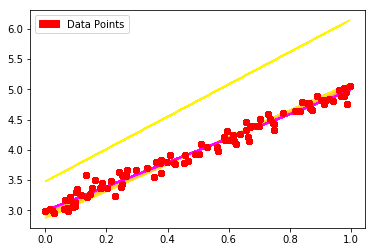

In [7]:
print('Plotting the data points with their corresponding fitted line...')
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)

for f in train_data:

    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)

    if cb > 1.0: cb = 1.0

    if cg < 0.0: cg = 0.0

    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(input_values)
    line = plt.plot(input_values, f_y)
    plt.setp(line, color=(cr,cg,cb))
    plt.plot(input_values, output_values, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

注意：Python len() 方法返回对象（字符、列表、元组等）长度或项目个数。
设置legend图例                      https://blog.csdn.net/Quincuntial/article/details/70947363
get_legend_handles_labels()方法返回 存在于图像中的 handles/artists 列表，这些图像可以用来生成结果图例中的入口。值得注意的是并不是所有的 artists 都可以被添加到图例中。为了全部控制添加到图例中的内容，通常直接传递适量的 handles 给legend()函数。

<font color=#FF0000> 逻辑回归模型的建立和培训</font>

同样的，基于我们在第二章中对逻辑回归模型的解释，数据建模运用在实际中---泰坦尼克号模型，我们将在tensorflow中实现逻辑回归算法。所以，简洁的说，逻辑回归通过逻辑函数/激活函数传递输入，然后将结果视为概率。


在tensorflow中应用逻辑回归

在tensorflow中应用逻辑回归之前，我们需要将要用到的库导入其中。你可以这么做实现这个目的：

In [8]:
import tensorflow as tf

import pandas as pd

import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


注意：Sklearn的train_test_split用法           https://blog.csdn.net/fxlou/article/details/79189106
在机器学习中，我们通常将原始数据按照比例分割为“测试集”和“训练集”，通常使用sklearn.cross_validation里的train_test_split模块用来分割数据

接下来，我们将加载将要使用的数据集。在本例中，我们使用的是内置的iris数据集，因此，不需要做任何预处理，我们可以直接操作它。我们把数据集分成x和y，然后再分成训练x和y和y随机检验(伪）

In [9]:
#我们将加载将要使用的数据集。在本例中，我们使用的是内置的iris数据集，因此，不需要做任何预处理，我们可以直接操作它。
#我们把数据集分成x和y，然后再分成训练集和测试集。

iris_dataset = load_iris()
iris_input_values, iris_output_values = iris_dataset.data[:-1,:], iris_dataset.target[:-1]
iris_output_values= pd.get_dummies(iris_output_values).values
train_input_values, test_input_values, train_target_values, test_target_values = train_test_split(iris_input_values, iris_output_values, test_size=0.33, random_state=42)


注意：pandas.get_dummies 的用法                   https://blog.csdn.net/maymay_/article/details/80198468

为什么使用占位符？
TensorFlow的这个特性允许我们创建一个算法，它可以接受数据并知道数据的形状，而不需要知道输入的数据量。当我们在训练中插入一批数据时，我们可以很容易地调整我们在一个步骤中训练的几个例子而不改变整个算法。

In [10]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
#这些占位符将保存我们的iris数据(包括特性和标签矩阵)，并帮助将它们传递到算法的不同部分。你可以将占位符看作是插入数据的空区域。
#我们还需要为它们提供与数据模型相对应的模型。之后，我们将通过feed_dict向占位符提供数据来向占位符插入数据
num_explanatory_features = train_input_values.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
num_target_values = train_target_values.shape[1]



# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
input_values = tf.placeholder(tf.float32, [None, num_explanatory_features]) # Iris has 4 features, so X is a tensor to hold our data.
output_values = tf.placeholder(tf.float32, [None, num_target_values]) # This will be our correct answers matrix for 3 classes.


注意： shape函数是numpy.core.fromnumeric中的函数，它的功能是查看矩阵或者数组的维数   https://blog.csdn.net/u010758410/article/details/71554224    tf.placeholder(dtype, shape=None, name=None)此函数可以理解为形参，用于定义过程，在执行的时候再赋具体的值,用于得到传递进来的真实的训练样本
参数：dtype：数据类型。常用的是tf.float32,tf.float64等数值类型  shape：数据形状。默认是None，就是一维值，也可以是多维，比如[2,3], [None, 3]表示列是3，行不定  name：名称                                https://blog.csdn.net/zj360202/article/details/70243127
TensorFlow 辨异 —— tf.placeholder 与 tf.Variable                 https://blog.csdn.net/lanchunhui/article/details/61712830       
为什么使用占位符？
TensorFlow的这个特性允许我们创建一个算法，它可以接受数据并知道数据的形状，而不需要知道输入的数据量。当我们在训练中插入一批数据时，我们可以很容易地调整我们在一个步骤中训练的几个例子而不改变整个算法。                                   

设立模型的权重和偏差

与线性回归非常相似，我们需要一个用于逻辑回归的共享可变加权矩阵。我们将W和b初始化为满是0的张量。既然我们要研究W和b，它们的初始值并不重要。这些变量是定义回归模型结构的对象，我们可以在它们经过训练之后保存它们以便以后可以重用它们。

我们将两个TensorFlow变量定义为参数。这些变量将会控制我们的逻辑回归的权重和偏差，并且使它们在训练过程中不断更新。注意到W的形状是[4,3]因为我们想用它乘以4维的输入向量来产生3维的向量，b的形状是[3]，所以我们可以把它添加到输出中。此外，与我们的占位符不同(占位符本质上是等待输入数据的空shell)。TensorFlow变量必须初始化为数值,通常,0。

In [11]:
#Randomly sample from a normal distribution with standard deviation .01
#设立模型的权重和偏差
#与线性回归非常相似，我们需要一个用于逻辑回归的共享可变加权矩阵。我们将W和b初始化为满是0的张量。既然我们要研究W和b，它们的初始值并不重要。
#我们将两个TensorFlow变量定义为参数。这些变量将会控制我们的逻辑回归的权重和偏差，并且使它们在训练过程中不断更新。
weights = tf.Variable(tf.random_normal([num_explanatory_features,num_target_values],
                                      mean=0,
                                      stddev=0.01,
                                      name="weights"))

biases = tf.Variable(tf.random_normal([1,num_target_values],
                                   mean=0,
                                   stddev=0.01,
                                   name="biases"))

注意：tf.random_normal()函数用于从服从指定正太分布的数值中取出指定个数的值。   https://blog.csdn.net/dcrmg/article/details/79028043 
tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
shape: 输出张量的形状，必选
mean: 正态分布的均值，默认为0
stddev: 正态分布的标准差，默认为1.0
dtype: 输出的类型，默认为tf.float32
seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样name: 操作的名称


逻辑回归模型

我们现在定义了我们的操作以便正确地运行逻辑回归，逻辑回归通常被认为是一个单一的方程：
      w=sigmod(wx+b)
不过，为了清晰起见，我们可以将其分为三个主要部分：
      权重乘以特征是矩阵乘法运算
      加权特征和偏置项的总和
      最后，激活函数的应用
因此,你会发现这些组件定义为三个独立的操作。

In [12]:
# Three-component breakdown of the Logistic Regression equation.         
# 逻辑回归，权重乘以特征是矩阵乘法运算
    #  加权特征和偏置项的总和
     # 最后，激活函数的应用
# Note that these feed into each other.
apply_weights = tf.matmul(input_values, weights, name="apply_weights")
add_bias = tf.add(apply_weights, biases, name="add_bias")
activation_output = tf.nn.sigmoid(add_bias, name="activation")


注意：tf.matmul矩阵相乘                                https://www.jianshu.com/p/19ea2d15eb14 
tf.add 相加                                https://blog.csdn.net/Hollake/article/details/79704129
tf.nn.sigmoid                                 https://www.w3cschool.cn/tensorflow_python/tensorflow_python-d46p2k47.html

正如我们之前看到的，我们要用到的函数是逻辑函数，通过偏差和权重判断哪个是输入数据。在Tensorflow中，这个函数通过nn.sigmoid实现，有效地，它将加权输入与偏置成0 - 100%曲线拟合，这是我们想要的概率函数。
<font color=#FF0000> 
训练
</font>
学习算法就是寻找最优权向量的方法（w），这种搜索是寻找优化误差/成本测量的假设的优化问题。
因此,模型的成本或损失函数会告诉我们我们的模型是不好的,我们需要这个函数最小化。您可以遵循不同的损失或成本标准。在这个实现中，我们将使用均方误差(MSE)作为一个损失函数。
为了完成最小化损失函数的任务，我们将使用梯度下降算法。
<font color=#FF0000> 
损失函数
</font>
在定义成本函数之前，我们需要确定训练需要多长时间以及如何定义学习速率。

In [13]:
#Number of training epochs                            
#定义时间长度和学习速率，损失函数和优化器
num_epochs = 700
# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step=1,
                                          decay_steps=train_input_values.shape[0],
                                          decay_rate=0.95,
                                          staircase=True)

# Defining our cost function - Squared Mean Error
model_cost = tf.nn.l2_loss(activation_output - output_values, name="squared_error_cost")
# Defining our Gradient Descent
model_train = tf.train.GradientDescentOptimizer(learningRate).minimize(model_cost)

注意：tf.train.exponential_decay                              https://blog.csdn.net/uestc_c2_403/article/details/72213286
初始的学习速率是0.0008，总的迭代次数是1次，如果staircase=True，那就表明每decay_steps次计算学习速率变化，更新原始学习速率，如果是False，那就是每一步都更新学习速率。红色表示False，绿色表示True。
l2_loss()这个函数的作用是利用L2范数来计算张量的误差值，但是没有开发并且只取L2范数的值的一半简单的可以理解成张量中的每一个元素进行平方，然后求和，最后乘一个1/2。l2_loss一般用于优化目标函数中的正则项，防止参数太多复杂容易过拟合(所谓的过拟合问题是指当一个模型很复杂时，它可以很好的“记忆”每一个训练数据中的随机噪声的部分而忘记了要去“学习”训练数据中通用的趋势)
https://blog.csdn.net/yangfengling1023/article/details/82910536

现在，是时候将我们的计算图表执行到会话变量中了
首先，我们需要用tf.initialize_all_variables()初始化权重和偏差，使其为0或随机值。这个初始化步骤将会成为我们计算图中的一个节点，当我们将图表放入一个会话中，操作会运行并创建变量。

In [14]:
# tensorflow session
sess = tf.Session()

# Initialize our variables.
init = tf.global_variables_initializer()
sess.run(init)

#We also want some additional operations to keep track of our model's efficiency over time. We can do this like so:
# argmax(activation_output, 1) returns the label with the most probability
# argmax(output_values, 1) is the correct label
correct_predictions = tf.equal(tf.argmax(activation_output,1),tf.argmax(output_values,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
model_accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))

# Summary op for regression output
activation_summary =  tf.summary.histogram("output", activation_output)

# Summary op for accuracy····
accuracy_summary = tf.summary.scalar("accuracy", model_accuracy)

# Summary op for cost
cost_summary = tf.summary.scalar("cost", model_cost)

# Summary ops to check how variables weights and biases are updating after each iteration to be visualized in tenorboard
weight_summary = tf.summary.histogram("weights", weights.eval(session=sess))
bias_summary = tf.summary.histogram("biases", biases.eval(session=sess))

merged = tf.summary.merge([activation_summary, accuracy_summary, cost_summary, weight_summary, bias_summary])
writer = tf.summary.FileWriter("summary_logs", sess.graph)

#Now we can define and run the actual training loop, like this:
# Initialize reporting variables

inital_cost = 0
diff = 1
epoch_vals = []
accuracy_vals = []
costs = []

# Training epochs
for i in range(num_epochs):
    if i > 1 and diff < .0001:
       print("change in cost %g; convergence."%diff)
       break

    else:
       # Run training step
       step = sess.run(model_train, feed_dict={input_values: train_input_values, output_values: train_target_values})

       # Report some stats evert 10 epochs
       if i % 10 == 0:
           # Add epoch to epoch_values
           epoch_vals.append(i)

           # 生成模型的精度统计数据
           train_accuracy, new_cost = sess.run([model_accuracy, model_cost], feed_dict={input_values: train_input_values, output_values: train_target_values})

           # 增加实时图形变量的准确性
           accuracy_vals.append(train_accuracy)

           # 添加动态绘图变量的损失
           costs.append(new_cost)

           # 为变量重新赋值
           diff = abs(new_cost - inital_cost)
           cost = new_cost


           print("Training step %d, accuracy %g, cost %g, cost change %g"%(i, train_accuracy, new_cost, diff))



Training step 0, accuracy 0.333333, cost 34.8673, cost change 34.8673
Training step 10, accuracy 0.494949, cost 30.2579, cost change 30.2579
Training step 20, accuracy 0.646465, cost 28.3077, cost change 28.3077
Training step 30, accuracy 0.646465, cost 26.6538, cost change 26.6538
Training step 40, accuracy 0.646465, cost 25.2748, cost change 25.2748
Training step 50, accuracy 0.646465, cost 24.1331, cost change 24.1331
Training step 60, accuracy 0.646465, cost 23.1868, cost change 23.1868
Training step 70, accuracy 0.646465, cost 22.398, cost change 22.398
Training step 80, accuracy 0.646465, cost 21.735, cost change 21.735
Training step 90, accuracy 0.646465, cost 21.1722, cost change 21.1722
Training step 100, accuracy 0.656566, cost 20.6899, cost change 20.6899
Training step 110, accuracy 0.666667, cost 20.2723, cost change 20.2723
Training step 120, accuracy 0.666667, cost 19.9074, cost change 19.9074
Training step 130, accuracy 0.666667, cost 19.5858, cost change 19.5858
Trainin

我们来看看经过训练的模型如何在iris数据集中执行，因此让我们根据测试集测试经过训练的模型。

注意：tf.equal(A, B)是对比这两个矩阵或者向量的相等的元素，如果是相等的那就返回True，反正返回False，返回的值的矩阵维度和A是一样的
https://blog.csdn.net/uestc_c2_403/article/details/72232924
tf.reduce.mean 求平均值           https://blog.csdn.net/qq_32166627/article/details/52734387
TensorBoard读取TensorFlow的events文件，这些文件在运行TensorFlow时可以保存下来。
如果想要记录learning rate和目标函数。可以将tf.summary.scalar放在相应的节点上。
如果想要可视化激活函数的分布，或者是梯度或权重的分布，可以将tf.summary.histogram放在相应的节点。
这些summary节点并不在之前创建的图中，所以，需要用tf.summary.merge_all将它们结合成一个操作。
最后，由tf.summary.FileWriter来存储数据。log_path为存储路径
https://blog.csdn.net/ls617386/article/details/62049834


In [15]:
# test the model against the test set
print("final accuracy on test set: %s" %str(sess.run(model_accuracy,
                                                    feed_dict={input_values: test_input_values,
                                                               output_values: test_target_values})))

final accuracy on test set: 0.9


在测试集上获得0.9精度是很好的，您可以通过改变次数来获得更好的结果。

<font color=#FF0000> 总结</font>

在这一章中，我们对神经网络和多层神经网络的需求进行了基本的解释，我们还用一些基本的例子介绍了tensorflow计算图模型，如线性回归和逻辑回归。
接下来，我们将介绍更高级的示例，并演示如何使用TensorFlow构建类似于手写字符识别的东西。我们还将处理在传统机器学习中取代特征工程的架构工程的核心思想。